In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import missingno as msno
from statsmodels.graphics.tsaplots import plot_acf

# Plots - market of gold
## Gold exchanges

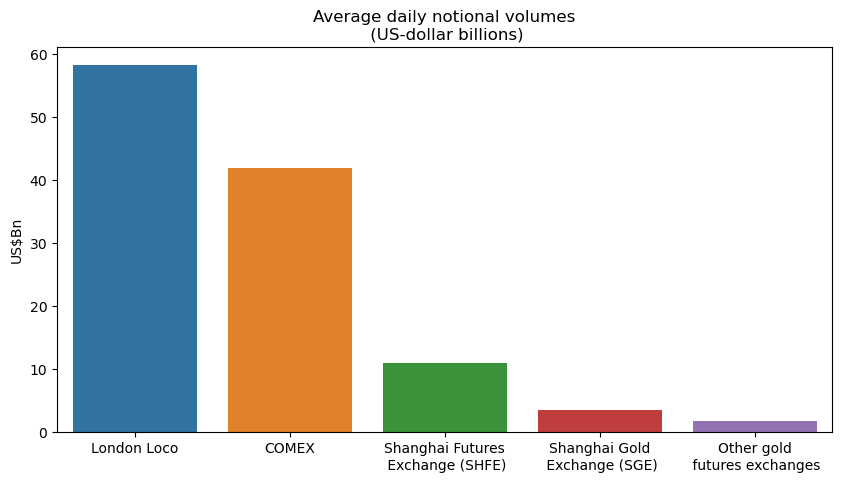

In [2]:
gex = {'Exchange':['London Loco', 'COMEX', 'Shanghai Futures\n Exchange (SHFE)', 'Shanghai Gold\n Exchange (SGE)', 'Other gold\n futures exchanges'], 'US$Bn':[58.18, 41.93, 10.94, 3.57, 1.81]}

fig, ax = plt.subplots()
sns.barplot(x='Exchange', y='US$Bn', data=gex)
fig.set_size_inches(10,5)
plt.ylabel('US$Bn')
plt.title('Average daily notional volumes\n (US-dollar billions)')
plt.show()

## Supply and demand

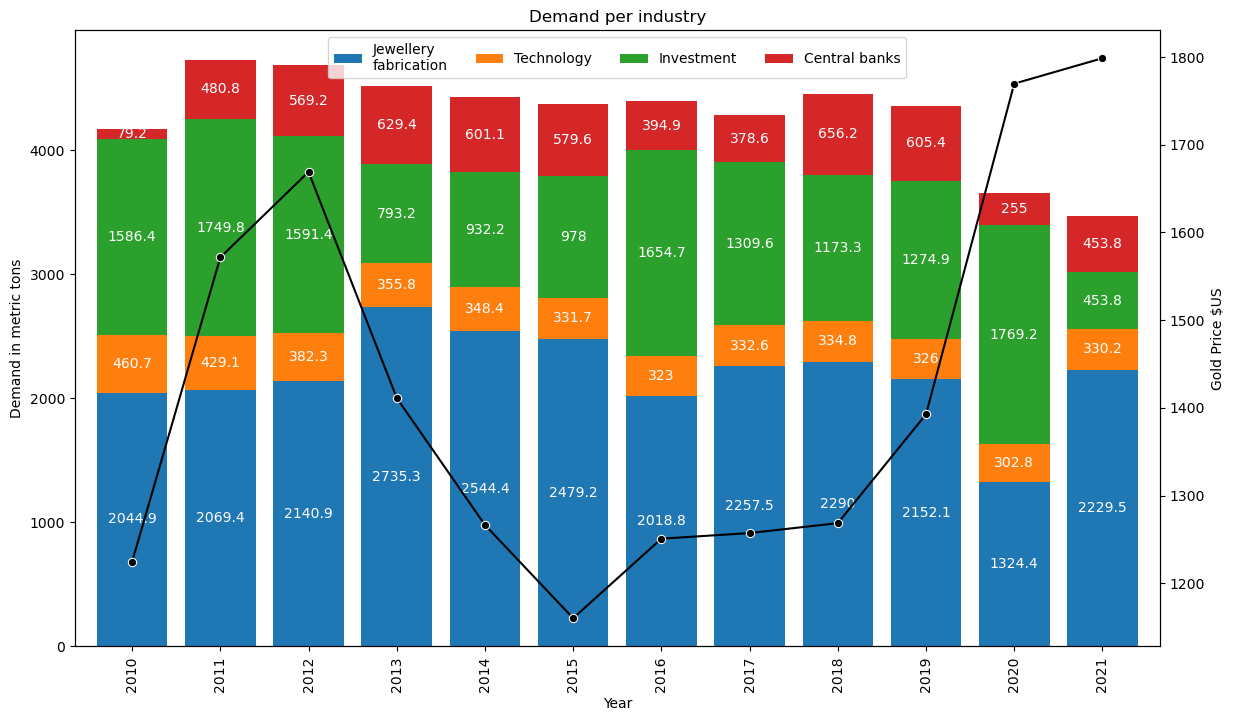

In [3]:
demand = {'year':[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021],
        'Jewellery\n fabrication':[2044.9, 2069.4,2140.9,2735.3,2544.4,2479.2,2018.8,2257.5,2290, 2152.1,1324.4,2229.5],
        'Technology':[460.7,429.1,382.3,355.8,348.4,331.7,323,332.6,334.8,326,302.8,330.2],
        'Investment':[1586.4,1749.8,1591.4,793.2,932.2,978,1654.7,1309.6,1173.3,1274.9,1769.2,453.8],
        'Central\n banks':[79.2,480.8,569.2,629.4,601.1,579.6,394.9,378.6,656.2,605.4,255,453.8],}
gprice = {'year':[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021],
        'LMBA Gold Price\n (US$/Oz)':[1224.5,1571.5,1669,1411.2,1266.4,1160.1,1250.8,1257.2,1268.5,1392.6,1769.6,1798.6]}

demanddf = pd.DataFrame(demand)

fig, ax1 = plt.subplots(figsize=(14,8))

demanddf.set_index('year').plot(kind='bar', width=0.8, stacked=True, ax=ax1)
for c in ax1.containers:
        ax1.bar_label(c, label_type='center', color='white')
ax2 = ax1.twinx()
sns.lineplot(data = gprice['LMBA Gold Price\n (US$/Oz)'], marker='o', sort = False, color='black', ax=ax2)
ax1.set_xlabel('Year')
ax1.set_ylabel('Demand in metric tons')
ax2.set_ylabel('Gold Price $US')
plt.title('Demand per industry')
ax1.legend(['Jewellery\nfabrication', 'Technology', 'Investment', 'Central banks'], loc=9, ncol=len(demanddf.columns))
plt.show()

# Data load

In [4]:
df= pd.read_csv('data/raw/raw_merged.csv', sep=';')
df.set_index('date', drop=True, inplace=True)
df.set_index(pd.to_datetime(df.index), inplace=True)
df.head()

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
1986-01-02,326.30,25.56,209.59,1417.26
1986-01-03,326.75,26.00,210.88,1424.61
1986-01-06,328.00,26.53,210.65,1430.96
1986-01-07,330.00,25.85,213.80,1421.22
1986-01-08,332.60,25.87,207.97,1408.79


#### Korekta ujemnej ceny kontraktów na ropę. Przyjąć cenę z dnia roboczego wcześniej (ceny kontraktów spadły poniżej 0 w dniu 20-04-2020)

In [5]:
display(df[df.CrudeOil<0])

df['CrudeOil'] = df.CrudeOil.apply(lambda x : x if x >= 0 else np.NaN)

display(df[df.index == '2020-04-20'])

df.interpolate(method='pad', inplace=True)

display(df[df.index > '2020-04-10'])

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2020-04-20,1686.2,-36.98,2823.16,15822.73


,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2020-04-20,1686.2,NaN,2823.16,15822.73


,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2020-04-14,1741.90,20.15,2846.06,16082.57
2020-04-15,1718.65,19.96,2783.36,15347.56
2020-04-16,1729.50,19.82,2799.55,15378.57
2020-04-17,1692.55,18.31,2874.56,15859.29
2020-04-20,1686.20,18.31,2823.16,15822.73
...,...,...,...,...
2022-12-30,1813.75,80.16,3839.50,18853.00
2023-01-03,1843.25,76.87,3824.14,19134.34
2023-01-04,1857.30,72.82,3852.97,19391.07


In [6]:
dfpc = df.copy()
dfpc = dfpc.pct_change().dropna()
dfpc.head()

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
1986-01-03,0.001379,0.017214,0.006155,0.005186
1986-01-06,0.003826,0.020385,-0.001091,0.004457
1986-01-07,0.006098,-0.025631,0.014954,-0.006807
1986-01-08,0.007879,0.000774,-0.027268,-0.008746
1986-01-09,0.002706,0.006185,-0.008944,-0.013941


In [7]:
# dfpc.to_csv('data/data_returns_clean.csv', sep=';')
# df.to_csv('data/data_nominal_clean.csv', sep=';')

<AxesSubplot:>

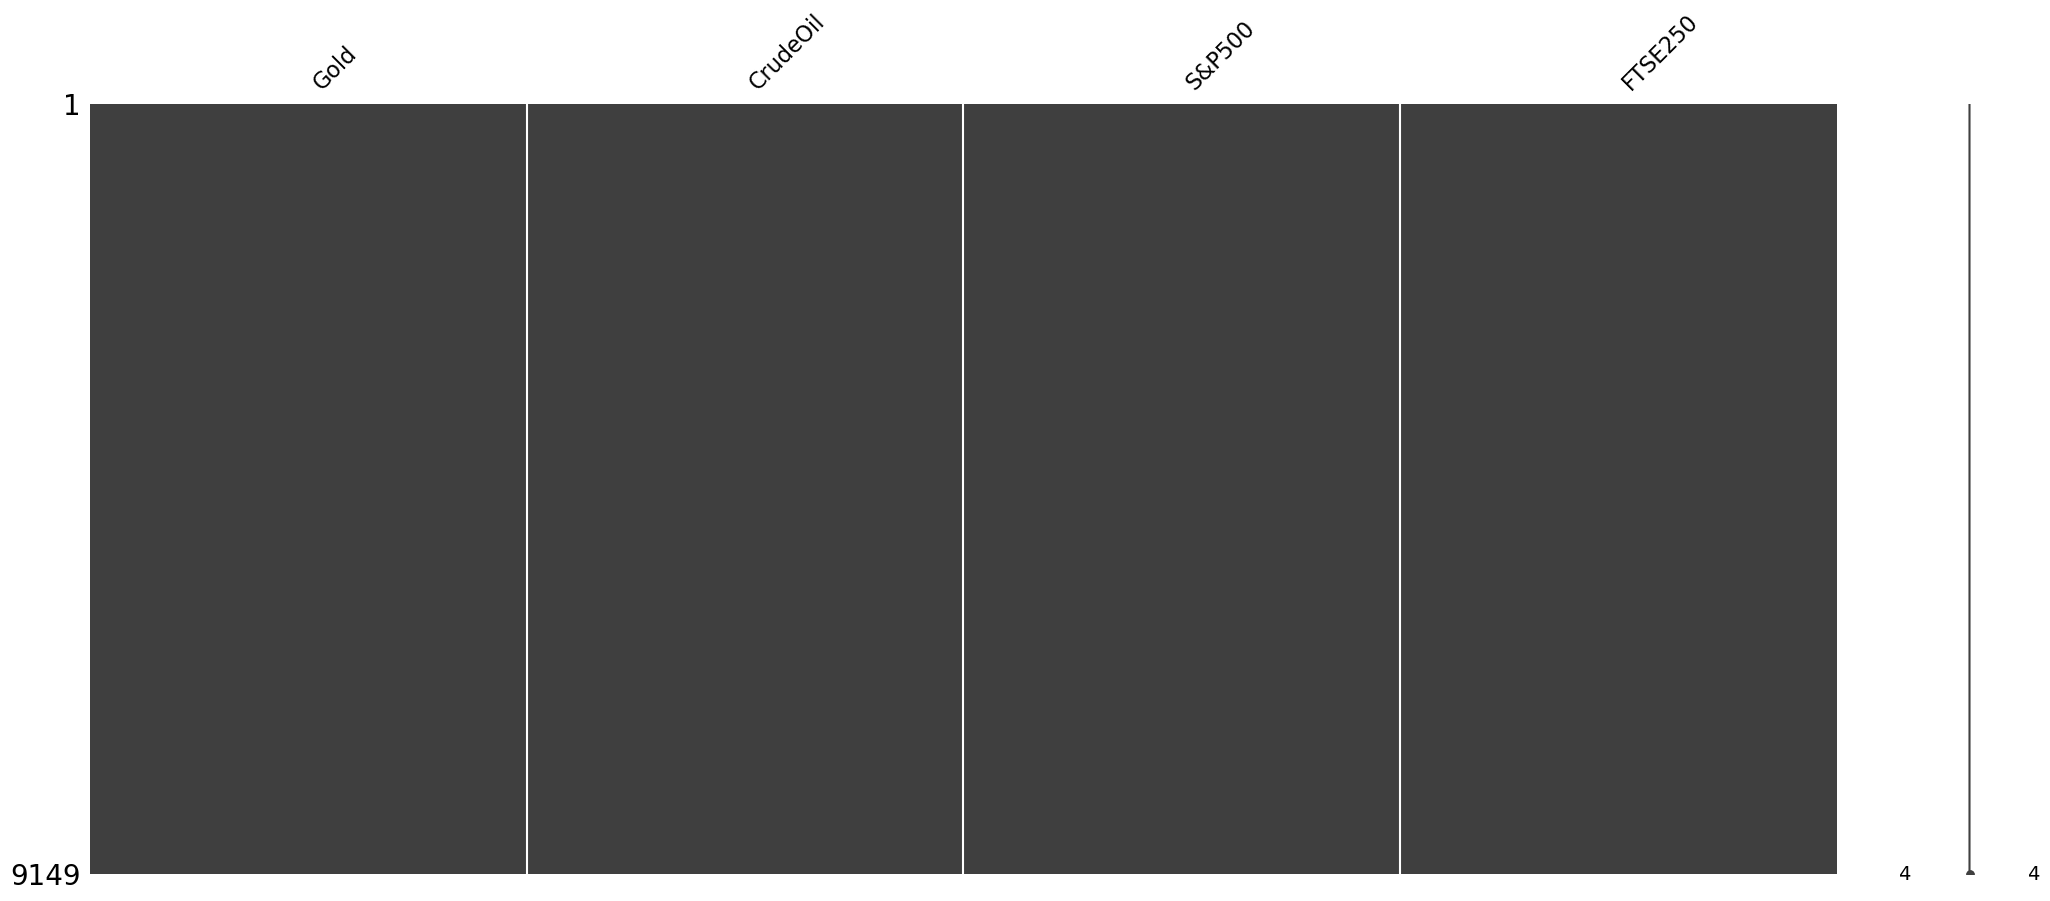

In [8]:
msno.matrix(df)

In [9]:
#df = df.dropna()
display(df.head())
df.tail()

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
1986-01-02,326.30,25.56,209.59,1417.26
1986-01-03,326.75,26.00,210.88,1424.61
1986-01-06,328.00,26.53,210.65,1430.96
1986-01-07,330.00,25.85,213.80,1421.22
1986-01-08,332.60,25.87,207.97,1408.79


,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2022-12-30,1813.75,80.16,3839.50,18853.00
2023-01-03,1843.25,76.87,3824.14,19134.34
2023-01-04,1857.30,72.82,3852.97,19391.07
2023-01-05,1834.00,73.61,3808.10,19463.43
2023-01-06,1852.20,73.77,3895.08,19504.72


---
# PRICE AND RETURNS PLOTS
---

Text(0.5, 1.0, 'FTSE250 price 1986-01-02 to 2023-01-06')

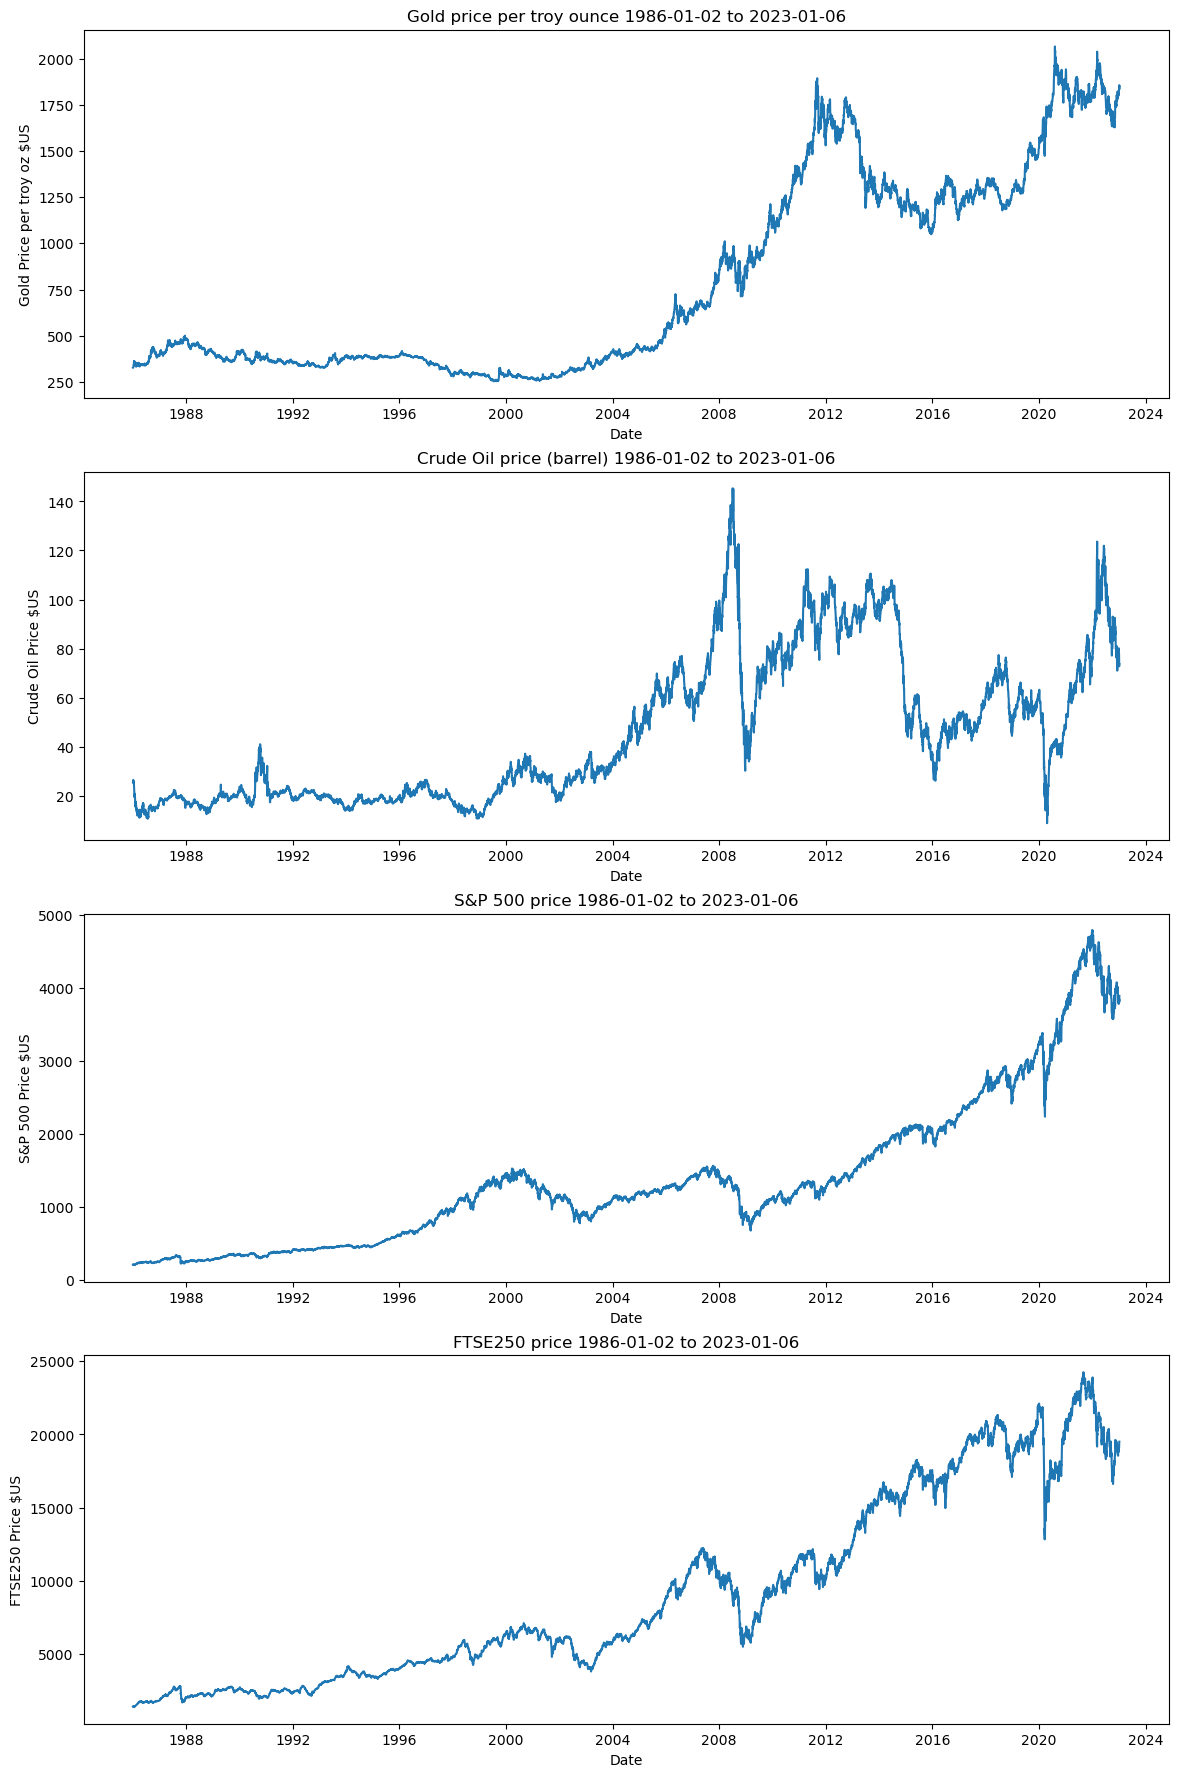

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(14,22))

# gold
sns.lineplot(x=df.index, y='Gold', data=df, ax=ax1)
ax1.set_ylabel('Gold Price per troy oz $US')
ax1.set_xlabel('Date')
ax1.set_title('Gold price per troy ounce 1986-01-02 to 2023-01-06')

# oil
sns.lineplot(x=df.index, y='CrudeOil', data=df, ax=ax2)
ax2.set_ylabel('Crude Oil Price $US')
ax2.set_xlabel('Date')
ax2.set_title('Crude Oil price (barrel) 1986-01-02 to 2023-01-06')

# sp
sns.lineplot(x=df.index, y='S&P500', data=df, ax=ax3)
ax3.set_ylabel('S&P 500 Price $US')
ax3.set_xlabel('Date')
ax3.set_title('S&P 500 price 1986-01-02 to 2023-01-06')

#ftse
sns.lineplot(x=df.index, y='FTSE250', data=df, ax=ax4)
ax4.set_ylabel('FTSE250 Price $US')
ax4.set_xlabel('Date')
ax4.set_title('FTSE250 price 1986-01-02 to 2023-01-06')

Text(0.5, 1.0, 'FTSE250 returns 1986-01-02 to 2023-01-06')

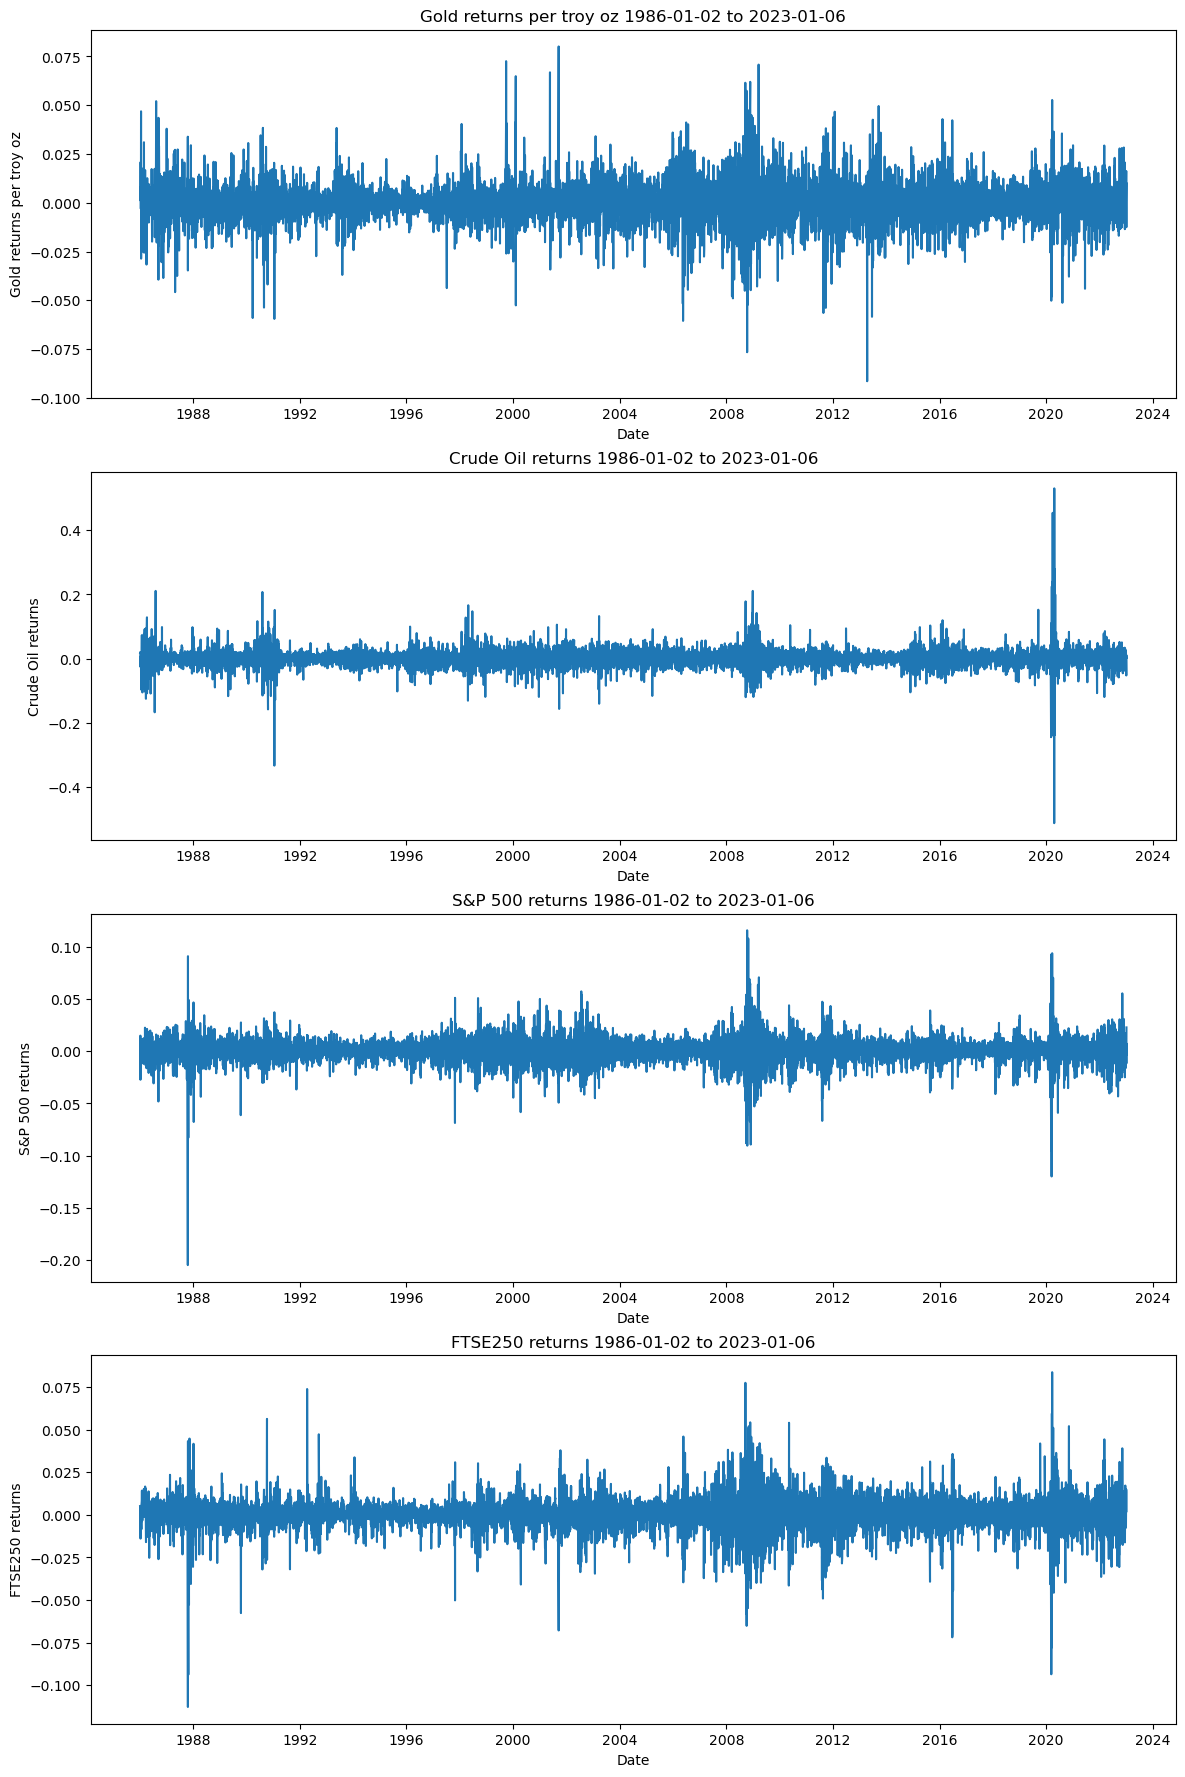

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(14,22))

# gold
sns.lineplot(x=dfpc.index, y='Gold', data=dfpc, ax=ax1)
ax1.set_ylabel('Gold returns per troy oz')
ax1.set_xlabel('Date')
ax1.set_title('Gold returns per troy oz 1986-01-02 to 2023-01-06')

# oil
sns.lineplot(x=dfpc.index, y='CrudeOil', data=dfpc, ax=ax2)
ax2.set_ylabel('Crude Oil returns')
ax2.set_xlabel('Date')
ax2.set_title('Crude Oil returns 1986-01-02 to 2023-01-06')

# sp
sns.lineplot(x=dfpc.index, y='S&P500', data=dfpc, ax=ax3)
ax3.set_ylabel('S&P 500 returns')
ax3.set_xlabel('Date')
ax3.set_title('S&P 500 returns 1986-01-02 to 2023-01-06')

#ftse
sns.lineplot(x=dfpc.index, y='FTSE250', data=dfpc, ax=ax4)
ax4.set_ylabel('FTSE250 returns')
ax4.set_xlabel('Date')
ax4.set_title('FTSE250 returns 1986-01-02 to 2023-01-06')

---
# STATISTICS

</br>

## 1. Correlation

In [12]:
import scipy 

def get_significance(pvalue):
    '''
    Helper function to make p-value visual with use of stars
    '''
    if pvalue > 0.1: return ''
    elif pvalue > 0.05: return '★'
    elif pvalue> 0.01: return '★★'
    else: return '★★★'

dfc = pd.DataFrame()
feat1s = []
feat2s = []
corrs = []
p_values = []

for feat1 in df.columns:
    for feat2 in df.columns:
        if feat1 != feat2:
            feat1s.append(feat1)
            feat2s.append(feat2)
            corr, p_value = scipy.stats.pearsonr(df[feat1], df[feat2])
            corrs.append(corr)
            p_values.append(p_value)

dfc['Feature_1'] = feat1s
dfc['Feature_2'] = feat2s
dfc['Correlation'] = corrs
dfc['p_value'] = p_values
dfc['p_value'] = dfc['p_value'].map(get_significance)
#dfc.to_csv('data/p_vals.csv', sep=';')

dfc

,Feature_1,Feature_2,Correlation,p_value
0,Gold,CrudeOil,0.743332,★★★
1,Gold,S&P500,0.792009,★★★
2,Gold,FTSE250,0.870773,★★★
3,CrudeOil,Gold,0.743332,★★★
4,CrudeOil,S&P500,0.527173,★★★
5,CrudeOil,FTSE250,0.646688,★★★
6,S&P500,Gold,0.792009,★★★
7,S&P500,CrudeOil,0.527173,★★★
8,S&P500,FTSE250,0.931175,★★★
9,FTSE250,Gold,0.870773,★★★


              Gold  CrudeOil    S&P500   FTSE250
Gold      1.000000  0.743332  0.792009  0.870773
CrudeOil  0.743332  1.000000  0.527173  0.646688
S&P500    0.792009  0.527173  1.000000  0.931175
FTSE250   0.870773  0.646688  0.931175  1.000000


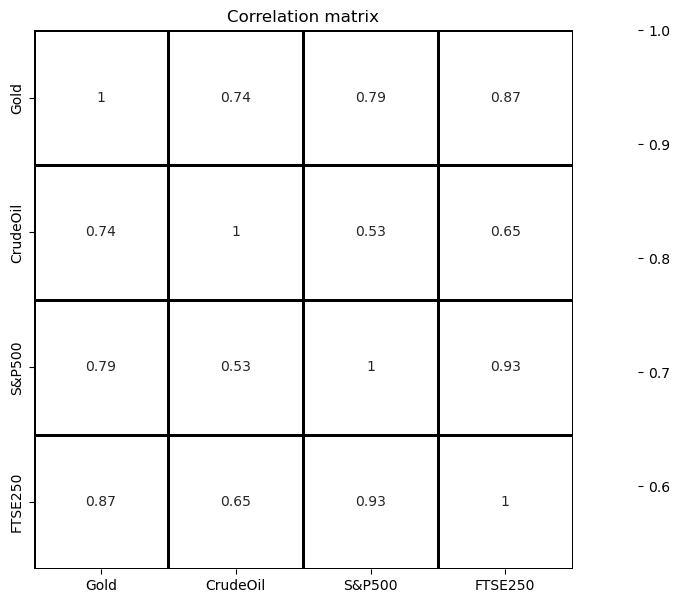

In [13]:
import numpy as np
from matplotlib.colors import ListedColormap
print(df.corr())
  
fig, ax = plt.subplots(figsize=(10,7))


sns.heatmap(df.corr('pearson'), cmap=ListedColormap(['white']), annot=True, square=True, linecolor='Black', linewidths=1) 
plt.title('Correlation matrix')
plt.show()

## Descriptive

In [14]:
dfdesc_price = df.describe()
#dfdesc_price.to_excel('data/data_descriptive_price.xlsx', engine='openpyxl')

dfdesc_ret = dfpc.describe()
#dfdesc_ret.to_excel('data/data_descriptive_returns.xlsx', engine='openpyxl')
dfdesc_ret

,Gold,CrudeOil,S&P500,FTSE250
count,9148.000000,9148.000000,9148.000000,9148.000000
mean,0.000240,0.000515,0.000389,0.000336
std,0.010012,0.028101,0.011771,0.009870
min,-0.091501,-0.513381,-0.204669,-0.112737
25%,-0.004456,-0.012118,-0.004514,-0.003918
50%,0.000147,0.000669,0.000656,0.000856
75%,0.005015,0.013273,0.005810,0.005037
max,0.080110,0.530864,0.115800,0.083707


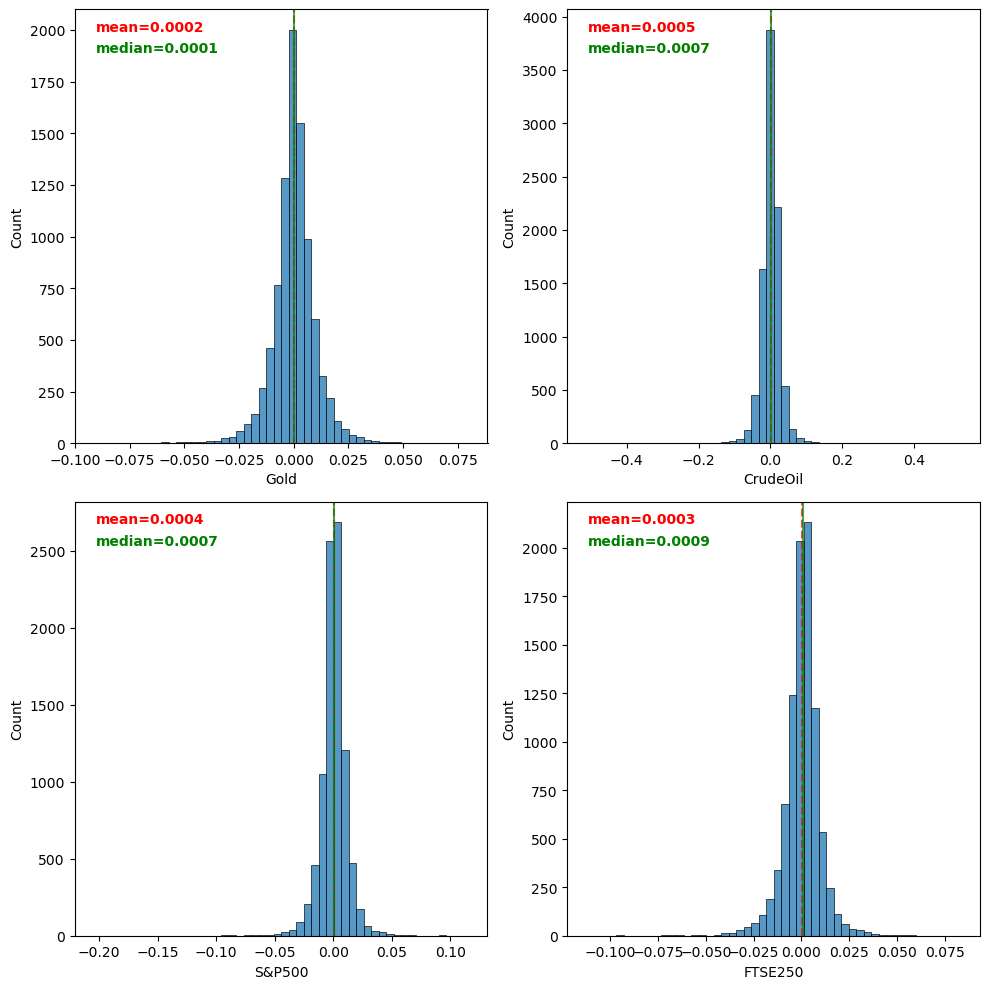

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

for ax, col in zip(axs, dfpc.columns):
    sns.histplot(dfpc[col], ax=ax, bins=50)
    mean = dfpc[col].mean()
    median = dfpc[col].median()
    ax.axvline(mean, color='red', linestyle='--', alpha=0.7)
    ax.axvline(median, color='green', linestyle='-', alpha=0.7)
    ax.text(0.05, 0.95, f'mean={mean:.4f}', color='red', transform=ax.transAxes, fontweight='bold')
    ax.text(0.05, 0.90, f'median={median:.4f}', color='green', transform=ax.transAxes, fontweight='bold')

plt.tight_layout()
plt.show()

seasonal decompose has problems with that data bc we dont have weekends, it would need a custom calendar for resampling like one below

In [16]:
# from pandas_market_calendars import get_calendar

# # get the custom calendar for NYSE
# nyse = get_calendar('NYSE')

# # set frequency to daily and use custom calendar
# df = df.resample('B', closed='right', label='right', base=0, convention='start').last().dropna()

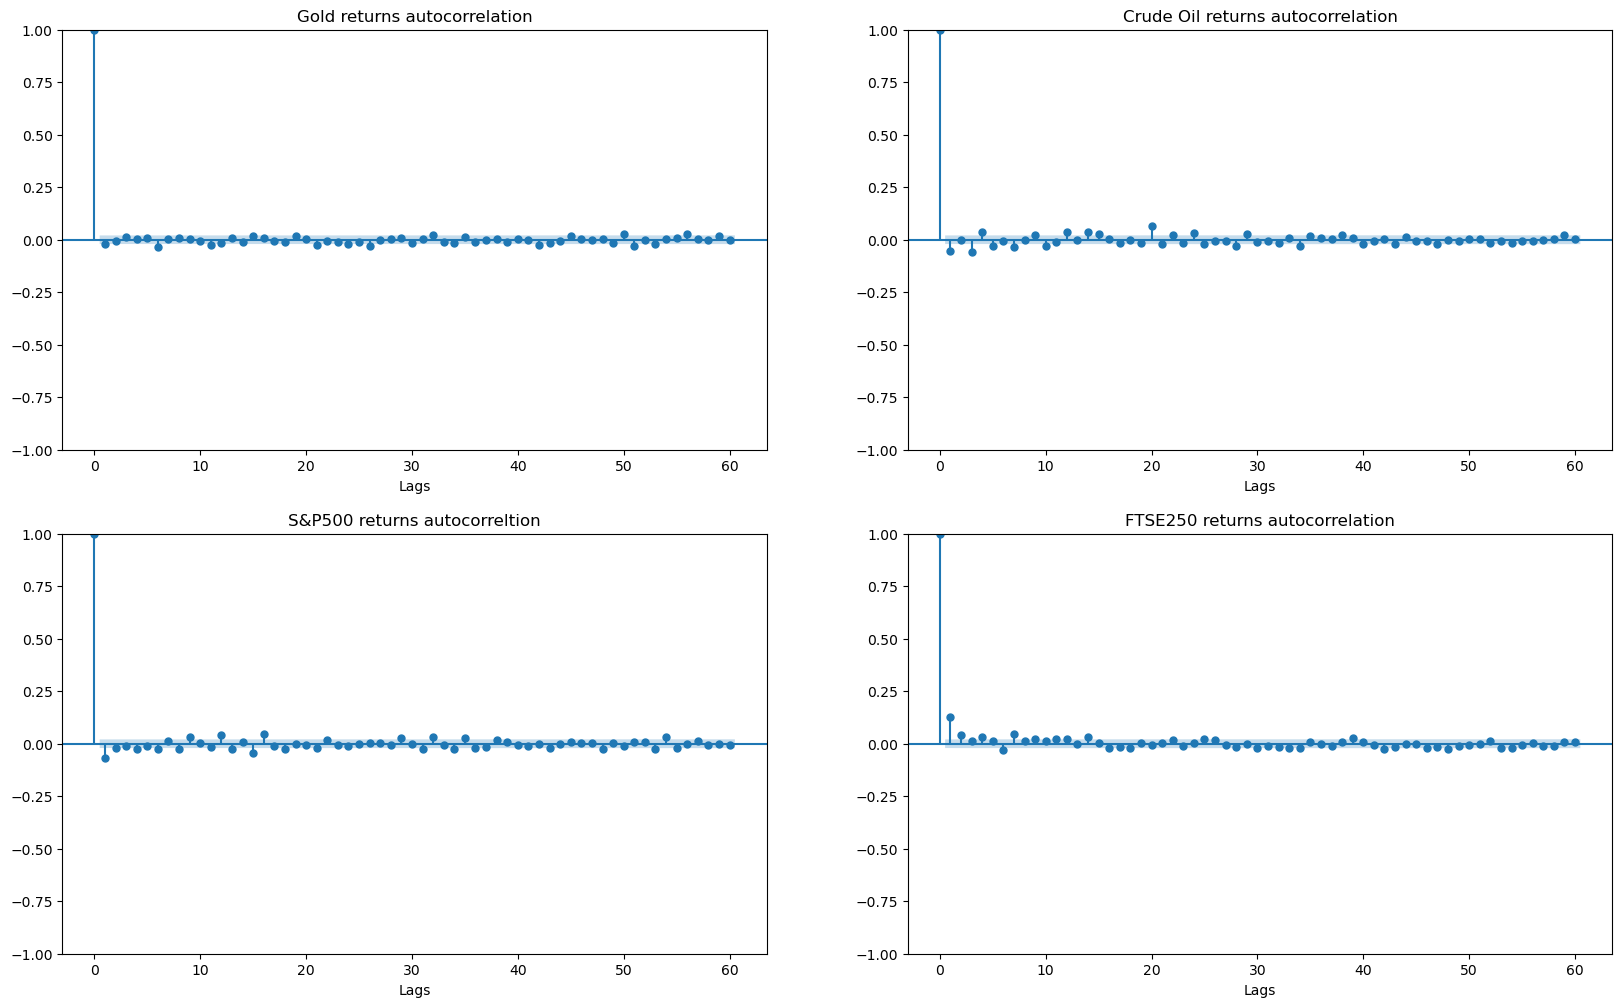

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

plot_acf(dfpc['Gold'], lags=60, ax=axs[0,0])
axs[0,0].set_title('Gold returns autocorrelation')
axs[0,0].set_xlabel('Lags')


plot_acf(dfpc['CrudeOil'], lags=60, ax=axs[0,1])
axs[0,1].set_title('Crude Oil returns autocorrelation')
axs[0,1].set_xlabel('Lags')

plot_acf(dfpc['S&P500'], lags=60, ax=axs[1,0])
axs[1,0].set_title('S&P500 returns autocorreltion')
axs[1,0].set_xlabel('Lags')

plot_acf(dfpc['FTSE250'], lags=60, ax=axs[1,1])
axs[1,1].set_title('FTSE250 returns autocorrelation')
axs[1,1].set_xlabel('Lags')
   
plt.show()

The autocorrelation measures the similarity between a time series and a lagged version of itself. A high autocorrelation at a particular lag indicates that there is a strong correlation between the time series and its lagged version at that lag. In other words, the value of the time series at a given point in time is likely to be similar to its value at a previous point in time, separated by the lag. The autocorrelation plot helps to identify any patterns or seasonality in the time series data.

Autocorrelation plots for time series data with seasonality and without seasonality will have different characteristics.

In time series data with seasonality, the autocorrelation plot will show strong correlations at regular, fixed intervals (lags) that correspond to the length of the seasonality. For example, if the data has daily seasonality, the autocorrelation plot may show strong correlations at lags of 7, 14, 21, etc. (corresponding to a week).

In contrast, in time series data without seasonality, the autocorrelation plot may show weak correlations or no correlations at any lag. The plot may appear as a flat line with values close to zero.

In practice, time series data often has both seasonality and other patterns, such as trend and random noise, so the autocorrelation plot may show strong correlations at some lags (corresponding to the seasonality) and weak or no correlations at other lags. The autocorrelation plot is useful in identifying the presence of seasonality in the data and determining the appropriate lag for modeling the data.

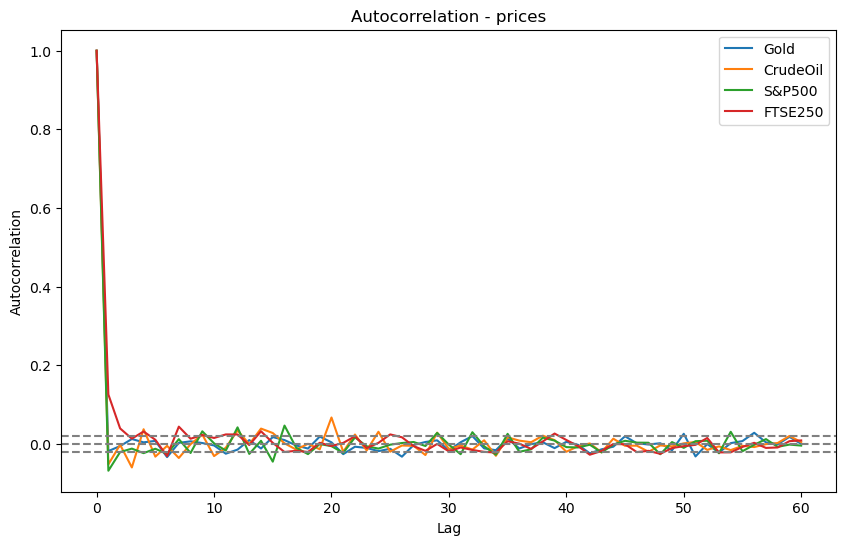

In [18]:
import statsmodels.tsa.stattools as stattools

# Plot the autocorrelation for each time series
plt.figure(figsize=(10, 6))
for col in dfpc.columns:
    autocorrelation = stattools.acf(dfpc[col], nlags=60)
    plt.plot(autocorrelation, label=col)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dfpc)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dfpc)), linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.title('Autocorrelation - prices')
plt.show()